In [2]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# convnet 정의
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        # CONV => RELU => POOL
        model.add(Conv2D(20, kernel_size = 5, padding = "same", input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
        # CONV => RELU => POOL
        model.add(Conv2D(50, kernel_size = 5, padding = "same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
        # Flaten => ReLU 계층
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        # 소프트맥스 분류기
        model.add(Dense(classes))
        model.add(Activation("softmax"))

In [14]:
NB_CLASSES = 10
IMG_ROWS, IMG_COLS = 28, 28
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)
model = Sequential()
# CONV => RELU => POOL
model.add(Conv2D(20, kernel_size = 5, padding = "same", input_shape=INPUT_SHAPE))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
# CONV => RELU => POOL
model.add(Conv2D(50, kernel_size = 5, padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
# Flaten => ReLU 계층
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))
# 소프트맥스 분류기
model.add(Dense(NB_CLASSES))
model.add(Activation("softmax"))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 20, 28, 28)        520       
_________________________________________________________________
activation_16 (Activation)   (None, 20, 28, 28)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 20, 14, 14)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 14, 14)        25050     
_________________________________________________________________
activation_17 (Activation)   (None, 50, 14, 14)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 7, 7)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2450)              0         
__________

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 109s 2ms/step - loss: 0.1843 - acc: 0.9439 - val_loss: 0.0584 - val_acc: 0.9817
Epoch 2/20
48000/48000 [==============================] - 96s 2ms/step - loss: 0.0500 - acc: 0.9846 - val_loss: 0.0438 - val_acc: 0.9866
Epoch 3/20
48000/48000 [==============================] - 96s 2ms/step - loss: 0.0335 - acc: 0.9892 - val_loss: 0.0390 - val_acc: 0.9877
Epoch 4/20
48000/48000 [==============================] - 98s 2ms/step - loss: 0.0228 - acc: 0.9931 - val_loss: 0.0304 - val_acc: 0.9912
Epoch 5/20
48000/48000 [==============================] - 98s 2ms/step - loss: 0.0190 - acc: 0.9936 - val_loss: 0.0341 - val_acc: 0.9901
Epoch 6/20
48000/48000 [==============================] - 96s 2ms/step - loss: 0.0139 - acc: 0.9954 - val_loss: 0.0344 - val_acc: 0.9893
Epoch 7/20
48000/48000 [==============================] - 96s 2ms/step - loss: 0.0118 - acc: 0.9957 - val_loss: 0.0333 - val_ac

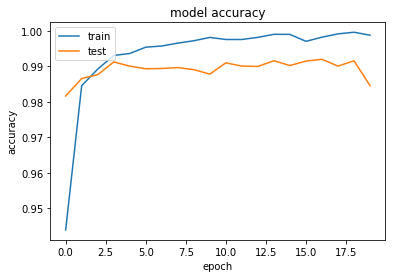

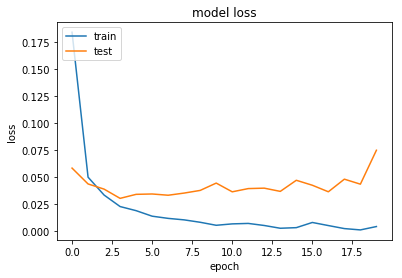

In [16]:
# 신경망과 학습에 대한 설정
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = 28, 28 # 입력 이미지 차원
NB_CLASSES = 10  # 출력 개수 = 숫자의 개수
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

#데이터 : 섞은 후에 학습 데이터와 테스트 데이터로 분할
(X_train, y_train), (X_test, y_test) = mnist.load_data()
K.set_image_dim_ordering("th")

#실수 형태로 지정하고 정규화
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# 60000개 * [1 * 28 * 28] 형태의 입력을 CONVNET에 전달
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]

# 클래스 벡터를 이진 클래스 행렬로 변환
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# 옵티마이저와 모델 초기화
# model = LeNet.build(input_shape = INPUT_SHAPE, classes = NB_CLASSES)
model.compile(loss = "categorical_crossentropy", optimizer = OPTIMIZER, metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score: ", score[0])
print("Test accuracy: ", score[1])

# 히스토리에 있는 모든 데이터 나열
print(history.history.keys())

# 단순 정확도 히스토리 요약
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 손실 히스토리 요약
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()